# Shoes (Nike, Adidas, Converse) CNN

In [213]:
import numpy as np
from tensorflow import keras
import glob
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

In [214]:
df = pd.read_csv("./Data/train+target.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,49143,49144,49145,49146,49147,49148,49149,49150,49151,target
0,0.015686,0.015686,0.015686,0.011765,0.011765,0.011765,0.007843,0.007843,0.007843,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.007843,0.007843,0.007843,1.0
1,0.117647,0.113725,0.105882,0.086275,0.082353,0.074510,0.054902,0.050980,0.043137,0.039216,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
2,0.086275,0.086275,0.086275,0.058824,0.058824,0.058824,0.031373,0.031373,0.031373,0.023529,...,0.015686,0.035294,0.011765,0.011765,0.039216,0.007843,0.011765,0.039216,0.007843,1.0
3,0.058824,0.062745,0.078431,0.090196,0.094118,0.109804,0.027451,0.031373,0.050980,0.050980,...,0.062745,0.043137,0.031373,0.054902,0.035294,0.023529,0.043137,0.023529,0.011765,1.0
4,0.094118,0.078431,0.074510,0.074510,0.058824,0.054902,0.062745,0.047059,0.043137,0.062745,...,0.015686,0.007843,0.011765,0.015686,0.007843,0.011765,0.015686,0.007843,0.011765,1.0


In [231]:
len(df)

1440

In [232]:
49151*1440

70777440

### Train

In [233]:
train = np.array(df.iloc[0:,:-1],dtype=np.int32)

In [234]:
train.shape

(1440, 49152)

### Target

In [235]:
target = df['target']

In [236]:
target = target - 1

In [237]:
target.shape

(1440,)

### Train Test Split

In [238]:
from sklearn.model_selection import train_test_split

In [290]:
# # 1. 데이터 준비
# train_input = train.reshape(-1,128,128,3)
# # train_input, test_scaled, train_target, test_target = train_test_split(train_input, target, test_size=0.2, random_state=42)
# # train_scaled, val_scaled, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)
# train_scaled, val_scaled, train_target, val_target = train_test_split(train_input, target, test_size=0.2)

In [292]:
# # 데이터 준비
# train_input = train.reshape(-1,128,128,3)
# train_scaled, val_scaled, train_target, val_target = train_test_split(train_input, target, test_size=0.2)
# # 모델 생성
# model = keras.Sequential()
# # 합성곱층
# model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding='same', input_shape = (128,128,3)))
# # 풀링층
# model.add(keras.layers.MaxPooling2D(2))
# # # 풀링층 추가
# # model.add(keras.layers.Conv2D(64, kernel_size = 3, activation='relu',padding='same'))
# # model.add(keras.layers.MaxPooling2D(2))
# # # 풀링층 추가
# # model.add(keras.layers.Conv2D(128, kernel_size = 3, activation='relu',padding='same'))
# # model.add(keras.layers.MaxPooling2D(2))
# # 은닉층
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(100,activation='relu'))
# model.add(keras.layers.Dropout(0.3))
# model.add(keras.layers.Dense(6,activation='softmax'))

In [332]:
train.shape

(1440, 49152)

In [347]:
# 데이터 준비
train_input = train.reshape(-1,128,128,3)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_input, target, test_size=0.2)


# 모델 생성
model = keras.Sequential()
# 합성곱층
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding='same', input_shape = (128,128,3)))
# 풀링층
model.add(keras.layers.MaxPooling2D(2))
# 은닉층
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(6,activation='softmax'))

In [348]:
print(train_scaled.shape)
print(val_scaled.shape)
print(train_target.shape)
print(val_target.shape)

(1152, 128, 128, 3)
(288, 128, 128, 3)
(1152,)
(288,)


In [349]:
model.summary()

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_91 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_89 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 flatten_49 (Flatten)        (None, 131072)            0         
                                                                 
 dense_97 (Dense)            (None, 100)               13107300  
                                                                 
 dropout_49 (Dropout)        (None, 100)               0         
                                                                 
 dense_98 (Dense)            (None, 6)                 606       
                                                     

In [355]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint("./Data/best_shoes_cnn.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=100, verbose=1, validation_data=[val_scaled,val_target],callbacks=[checkpoint_cb])

Epoch 1/100
36/36 [==============================] - 3s 68ms/step - loss: 0.4973 - accuracy: 0.8299 - val_loss: 0.6518 - val_accuracy: 0.7604
Epoch 2/100
36/36 [==============================] - 2s 67ms/step - loss: 0.5475 - accuracy: 0.8299 - val_loss: 0.7126 - val_accuracy: 0.6944
Epoch 3/100
36/36 [==============================] - 2s 68ms/step - loss: 0.4598 - accuracy: 0.8203 - val_loss: 0.6796 - val_accuracy: 0.7535
Epoch 4/100
36/36 [==============================] - 2s 69ms/step - loss: 0.4677 - accuracy: 0.8368 - val_loss: 0.7553 - val_accuracy: 0.7361
Epoch 5/100
36/36 [==============================] - 2s 62ms/step - loss: 0.4709 - accuracy: 0.8377 - val_loss: 0.7834 - val_accuracy: 0.7257
Epoch 6/100
36/36 [==============================] - 2s 63ms/step - loss: 0.4456 - accuracy: 0.8385 - val_loss: 0.7742 - val_accuracy: 0.7292
Epoch 7/100
36/36 [==============================] - 2s 66ms/step - loss: 0.4405 - accuracy: 0.8377 - val_loss: 0.7740 - val_accuracy: 0.7361
Epoch 

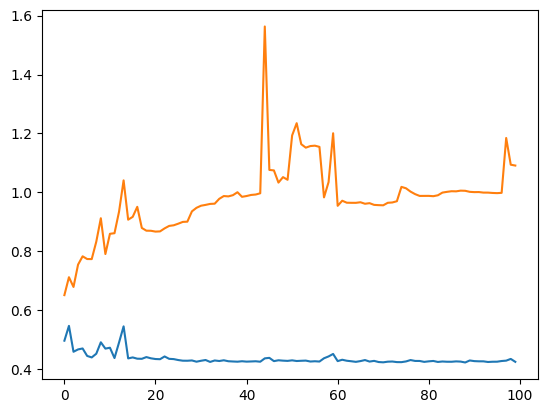

In [356]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

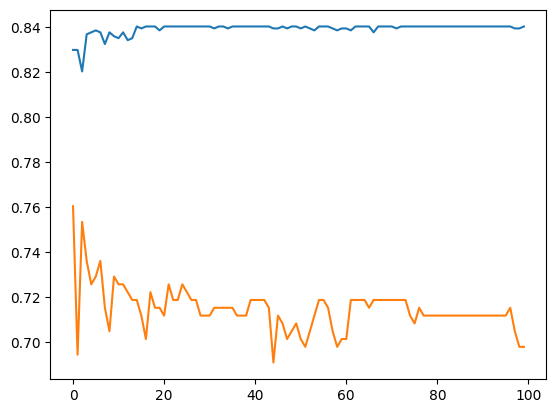

In [357]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [358]:
model.fit(val_scaled,val_target)

9/9 [==============================] - 1s 74ms/step - loss: 1.2518 - accuracy: 0.7014


In [359]:
best_model = keras.models.load_model("./Data/best_shoes_cnn.h5")
best_model.evaluate(train_scaled,train_target)

36/36 [==============================] - 1s 23ms/step - loss: 0.4248 - accuracy: 0.8403


[0.4247884154319763, 0.8402777910232544]